In [48]:

#importing Libraries
import os
import os.path
import numpy as np
import tensorflow
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
#loading Lable Files

In [9]:

files=[]
y=[]
file=[]
for dirpath, dirnames, filenames in os.walk(r'D:\bk\vikram_\Projects\Facial_emotions\Emotion'):
    #for i in range(0,len(filenames)):
    for filename in [f for f in filenames]:
        file.append(''.join(list(filename)[:8]))

        y.append(os.path.join(dirpath,filename))
    if y!=[]:
        files.append(y)
    y=[]

In [ ]:
#Loading Image Files

In [10]:
import os
import os.path
images=[]
x=[]
file2=[]
for dirpath, dirnames, filenames in os.walk(r'D:\bk\vikram_\Projects\Facial_emotions\cohn-kanade-images'):

    for filename in [f for f in filenames[len(filenames)//2:]]:
        
        if ((filename!=".DS_Store") and (''.join(list(filename)[:8]) in file)):
             
            #file2.append(filename)
                x.append(os.path.join(dirpath, filename))
    if (x!=[]):
        images.append(x)
    x=[]

In [ ]:
#loading frontal face Images detected by CV2

In [17]:
images_files=[]
label_files=[]
import cv2
import dlib
detector = dlib.get_frontal_face_detector()
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)
for i in range(0,len(images)):
    for j in images[i]:
        img_file = cv2.imread(j)
        rects = detector(img_file, 1)
        for (k, rect) in enumerate(rects):
            (x, y, w, h) = rect_to_bb(rect)
            img_file=img_file[y:y+h, x:x+w]
        if 0 not in img_file.shape:
            img_file = cv2.resize(img_file, (60, 60))
            img_file = img_to_array(img_file)
            img_file = (img_file) / 255.0
    #         print(j)
            images_files.append(img_file)
            label_files.append(str.strip(open(files[i][0], 'r').read().replace('\n','')).split())

In [19]:
len(label_files)

3017

In [ ]:
#Processing the outputs to get to the required shape

In [20]:
#round(float(label_files[1][1]))
for i in range(0,len(label_files)):
        for j in range(0,len(label_files[i])):
            label_files[i][j]=round(float(label_files[i][j]))
label_files=[[int(s) for s in sublist] for sublist in label_files]
label_files=[item[0] for item in label_files]

In [22]:
#One hot encoding of the labels

In [37]:

ind=pd.get_dummies(label_files,sparse=True)
labels=pd.get_dummies(label_files,sparse=True)

In [36]:
set(label_files)

{1, 2, 3, 4, 5, 6, 7}

In [38]:
#Converting the Inputs and outputs in to Network acceptable format
images_files = np.array(images_files, dtype="float")

labels = np.array(labels)

In [ ]:
#Splitting the data in to test and train

In [39]:
(trainX, testX, trainY, testY) = train_test_split(images_files,
labels, test_size=0.2, random_state=42)


In [ ]:
#initialze the network to Glorot/Xavier

In [50]:
initializer = tensorflow.keras.initializers.GlorotUniform()

In [66]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(60, 60, 3),kernel_initializer=initializer))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(64,kernel_initializer=initializer))
 
# use a *softmax* activation for single-label classification
# and *sigmoid* activation for multi-label classification
#model.add(Flatten())
model.add(Dense(7,kernel_initializer=initializer))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer='adam')

In [67]:
EPOCHS = 10

history=model.fit(
	trainX, trainY, batch_size=32,
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // 100,
	epochs=EPOCHS, verbose=1)

Epoch 1/10
24/24 [==============================] - 2s 53ms/step - loss: 4.8293 - val_loss: 1.6585
Epoch 2/10
24/24 [==============================] - 1s 47ms/step - loss: 0.7601 - val_loss: 1.3020
Epoch 3/10
24/24 [==============================] - 1s 50ms/step - loss: 0.3154 - val_loss: 1.1488
Epoch 4/10
24/24 [==============================] - 1s 52ms/step - loss: 0.1606 - val_loss: 1.1665
Epoch 5/10
24/24 [==============================] - 2s 82ms/step - loss: 0.0974 - val_loss: 1.1299
Epoch 6/10
24/24 [==============================] - 2s 77ms/step - loss: 0.0751 - val_loss: 0.8771
Epoch 7/10
24/24 [==============================] - 2s 81ms/step - loss: 0.0661 - val_loss: 0.9308
Epoch 8/10
24/24 [==============================] - 2s 79ms/step - loss: 0.0546 - val_loss: 0.7693
Epoch 9/10
24/24 [==============================] - 2s 81ms/step - loss: 0.0800 - val_loss: 0.5437
Epoch 10/10
24/24 [==============================] - 2s 85ms/step - loss: 0.0234 - val_loss: 0.4467


In [71]:
model.save('emotions_model.h5')

In [ ]:
#Plotting the train and test loss graphs

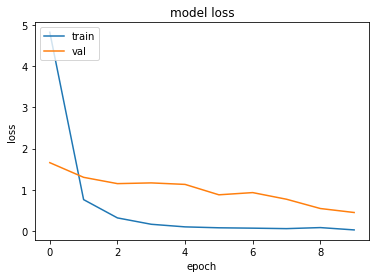

In [68]:
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()